# Q1

We are going to prove the following identity for the sigmoid function:

$$

\begin{align*}
g(z) + g(-z) &= 1
\\
g(z) &= g(z)g(-z) = g(z)(1 - g(z))
\\
g'(-z) &= g'(z)
\\
g''(z) &= g(z)g(-z)[g(-z) - g(z)]

\end{align*}


$$


$$



\begin{align*}

(a)
\\
g(z) &= \frac{1}{1 + e^{-z}}
\\
g(-z) &= \frac{1}{1 + e^{z}}

\\

g(z) + g(-z) &= \frac{1}{1 + e^{-z}} + \frac{1}{1 + e^{z}}
\\
g(z) + g(-z) &= \frac{1 + e^{z} + 1 + e^{-z}}{(1 + e^{-z})(1 + e^{z})}

\\

g(z) + g(-z) &= \frac{2 + e^{z} + e^{-z}}{1 + e^{z} + e^{-z} + e^{z}e^{-z}}
\\
g(z) + g(-z) &= \frac{2 + e^{z} + e^{-z}}{1 + e^{z} + e^{-z} + 1}

\\
\\

g(z) + g(-z) &= \frac{2 + e^{z} + e^{-z}}{2 + e^{z} + e^{-z}}
\\
g(z) + g(-z) &= 1
\\
QED
\end{align*}

$$


\begin{align*}

(b)
\\
g'(z) &= \frac{e^{-z}}{(1 + e^{-z})^2}
\\
g(z)g(-z) &= \frac{1}{(1 + e^{-z})(1 + e^{z})}
\\
g(z)g(-z) &= \frac{1}{1 + e^{z} + e^{-z} + 1}
\\
g(z)g(-z) &= \frac{1}{2 + e^{z} + e^{-z}}
\\
g(z)g(-z) &= \frac{1}{2 + e^{z} + e^{-z}}\frac{e^{-z}}{e^{-z}}
\\ 
g(z)g(-z) &= \frac{e^{-z}}{2e^{-z} + e^{z}e^{-z} + e^{-2z}}
\\
g(z)g(-z) &= \frac{e^{-z}}{1 + 2e^{-z} + e^{-2z}}
\\
g(z)g(-z) &= \frac{e^{-z}}{(1 + e^{-z})^2}
\\
Hence, 
\\
g(z)g(-z) &= g'(z)
\\
\text{From part (a),}
\\
g(z) + g(-z) &= 1
\\
g(-z) &= 1 - g(z)
\\
\text{Hence, }
\\
g(z)g(-z) &= g(z)(1 - g(z))
\\
\text{Hence, }
\\
g'(z) &= g(z)g(-z) = g(z)(1 - g(z))
\\
QED

\end{align*}

$$

\begin{align*}

(c)
\\
\text{From part (b),}
\\
g'(z) &= g(z)g(-z)
\\
g'(-z) &= g(-z)g(z) = g(z)g(-z)
\\
\text{Hence, }
\\
g'(z) &= g'(-z)
\\
QED

\end{align*}

$$



$$
\begin{align*}

(d)

\\
g'(z) &= g(z)g(-z)
\\
g''(z) &= g'(z)g(-z) + g(z)g'(-z)(-1)
\\
g''(z) &= g'(z)g(-z) - g(z)g'(z)
\\
g''(z) &= g(z)g(-z)g(-z) - g(z)g(z)g(-z)
\\
g''(z) &= g(z)g(-z)[g(-z) - g(z)]
\\
QED




\end{align*}


# Q2

In [433]:
!pip install scikit-learn

  Transverse field Ising Model quantum Monte Carlo simulation data  \
0                                        Ssytem size                 
1                                                NaN                 
2                                                  h                 
3                                                0.8                 
4                                               0.85                 
5                                                0.9                 
6                                               0.95                 
7                                                  1                 
8                                               1.05                 
9                                                1.1                 

    Unnamed: 1  
0           32  
1          NaN  
2        <|m|>  
3  0.880314348  
4  0.851729778  
5  0.811670463  
6  0.741060799  
7  0.569485378  
8  0.333828539  
9  0.211542187  
X: [[0.8 ]
 [0.85]
 [0.9 ]
 [0.95]
 [1.  ]

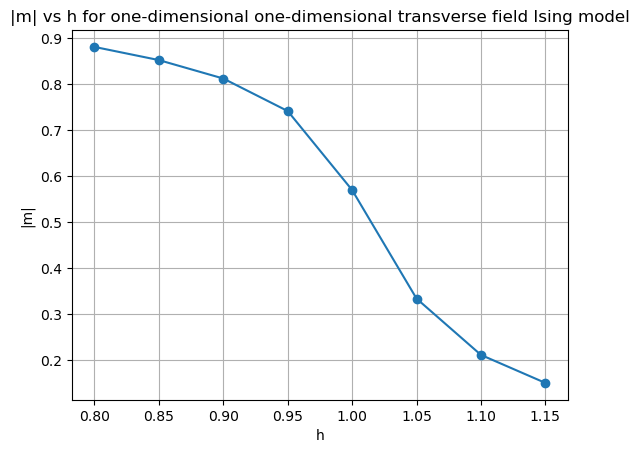

Initial theta: [[0.]
 [0.]]


/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_64764/3352422195.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[it] = computeCost(theta, X, y)


Optimized theta: [[ 71.43000137]
 [-69.70307484]]


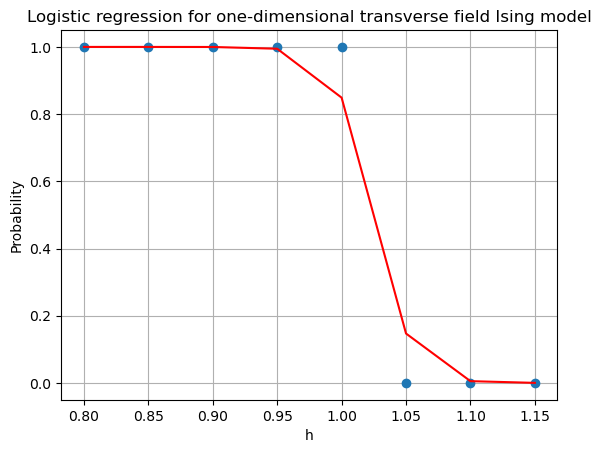

In [434]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/charleswong/Desktop/PHYS3151_asm3_current/results_1DTFIM_L_32.csv", sep=",")
print(df.head(10))

# Define helper functions
#These function are provided by the lecturer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def computeCost(theta, X, y):
    m = float(len(y))
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(predictions)) + (1-y).T.dot(np.log(1-predictions)))
    return cost

def gradient_descent(X, y, theta, alpha=0.01, iterations=100):
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, X.shape[1]))
    for it in range(iterations):
        prediction = sigmoid(X.dot(theta))
        theta = theta - (alpha/m) * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.flatten()
        cost_history[it] = computeCost(theta, X, y)
    return theta, cost_history, theta_history



# Prepare data, since the data was stored as string, we need to convert them to float
X = df.iloc[3:11, -2].astype(float).values.reshape(-1, 1)
y = df.iloc[3:11, -1].astype(float).values.reshape(-1, 1)
# print("X shape:", X.shape)
print("X:", X)
# print("y:", y)

#plot the data of |m| vs h with line linking them and also grid
plt.plot(X, y, 'o-')
plt.grid()
plt.xlabel('h')
plt.ylabel('|m|')
plt.title('|m| vs h for one-dimensional one-dimensional transverse field Ising model')
plt.show()


# Convert |m| to binary values based on threshold 0.5
y = (df.iloc[3:11, -1].astype(float).values > 0.5).astype(int).reshape(-1, 1)
# print("x:", X)


# Add bias term
X_b = np.c_[np.ones((len(X), 1)), X]

# Initialize theta correctly 
n = X_b.shape[1]
theta = np.zeros((n, 1))
print("Initial theta:", theta)

# Run gradient descent
alpha = 0.1 # learning rate same as the tutor
n_iter = 500000
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, alpha, n_iter)
print("Optimized theta:", theta)

#plot the logistic regression results with |m| >0.5 as 1 and |m| <0.5 as 0
#y axis as the probability and x axis as h

plt.plot(X, y, 'o')
plt.plot(X, sigmoid(X_b.dot(theta)), 'r-')
plt.grid()
plt.xlabel('h')
plt.ylabel('Probability')
plt.title('Logistic regression for one-dimensional transverse field Ising model')
plt.show()




In [435]:
# Find hc from the logistic regression
hc = -theta[0] / theta[1]
print("Critical point hc:", hc)


Critical point hc: [1.02477547]


The results are consistenti with figure 1 and 2

# Q3

In [436]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In a two-dimensional ferromagnetic square lattice, spin waves arise from collec-
tive excitations of spins, which is described by the following energy-momentum
relation,

$$E(k_x, k_y)= JS ( 4 - 2\cos k_x a - 2\cos k_y a)$$

where J is the exchange interaction, S is the quantum spin number, a is the lattice
constant, and (kx, ky) are the x and y component of the momentum. This model
is fundamental in understanding magnetism in low-dimensional systems.

We set $J = 1$, $S = 1/2$ , $a = 1$ and $(k_x, k_y) \in [− π/a , π/a ]^2$ in the following of our
calculation. Since the result is symmetric in each quadrant, only required to show the result in the first quadrant of $(k_x, k_y)$.

Thus, we have 
$$E(k_x, k_y)=  \frac{1}{2}  ( 4 - 2\cos k_x  - 2\cos k_y ) = 2 - \cos k_x  - \cos k_y$$

# Part a
 Plot a function $E(k_x, k_y)$ in the region $(k_x, k_y) \in [− π/a , π/a ]^2$.

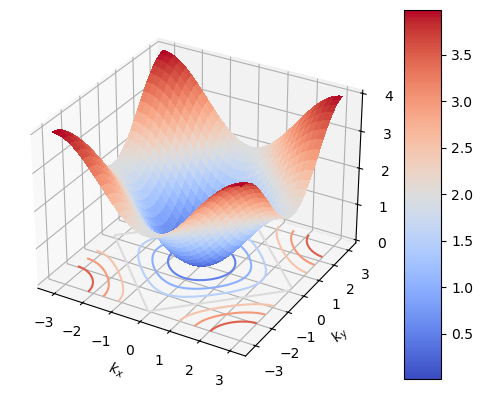

In [437]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Make data.
X = np.arange(-np.pi, np.pi, 0.1)
Y = np.arange(-np.pi, np.pi, 0.1)

X, Y = np.meshgrid(X, Y)
Z = 2 - np.cos(X) - np.cos(Y) # This line of the code is different from the colab one 

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=10)
plt.show()

# Part b
Set the energy $E(k_x, k_y) = 2$. Perform logistic regression and support vector machine with feature $X_1 = [k_x, k_y]$, $N = 100$ sample points, 20,000 iteration steps, evaluate the performance of these two methods on drawing the energy contour. Please, the result of two methods and the energy contour on
the $(kx, ky)$ space. You can refer to the plots (3), (4).

### SVM

In [438]:
N=100
mu=2    #chemical potential same as E(kx,ky)

In [439]:
kx_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
ky_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))

In [440]:
# E=[float(-2*(np.cos(kx_list[i])+np.cos(ky_list[i]))) for i in range(N)]
E=[float(2 - np.cos(kx_list[i]) - np.cos(ky_list[i])) for i in range(N)] # E(k)=2 - cos(kx) - cos(ky)
print(E)
occupancy=[E[i]<=mu for i in range(N)]
print(occupancy)

[0.32230615915475125, 1.950486980814793, 1.871286065643921, 1.5280532746733697, 3.869100706820724, 3.126558983231868, 1.7967416291429177, 1.127824376694036, 1.8818802051159054, 3.6191655734614385, 3.0218821244675613, 3.963885247406467, 0.4143779837166359, 0.9165473145046181, 1.3906526721215, 2.251262994267625, 0.029300910033017047, 2.6810903380226363, 2.8959307067783544, 3.7700936671661465, 1.9085158964175777, 0.8618554349644985, 1.5094596283782364, 2.457018773819504, 2.6319606709094763, 0.568206775077679, 1.9726373966724584, 0.08765348766236358, 1.8510778759019935, 0.08568924392523825, 0.40432103432972344, 3.118734450611942, 2.8027707288472623, 2.468697728781831, 1.3803686658613437, 0.7020368704065247, 2.122302874241898, 0.1758122432848881, 1.5099915542544164, 0.6763654650174294, 3.2702334516726514, 1.1564558157712432, 1.7375376245558574, 1.1651044092117684, 2.1391234110222443, 1.3821160272262587, 0.7397858165658694, 3.593861363373731, 1.0553969657800892, 0.1599078661490323, 3.2499428

/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_64764/1139166447.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E=[float(2 - np.cos(kx_list[i]) - np.cos(ky_list[i])) for i in range(N)] # E(k)=2 - cos(kx) - cos(ky)


In [441]:
def hinge(X,y,theta):                        #for maximum-margin classification, for penalizing misclassification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta):
    m = float(len(y))
    theta2 = np.square(theta[1:])
    cost = (1/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

In [442]:
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]

    fx = np.multiply(y,(X_b.dot(theta)))

    check = np.less(fx,np.ones(fx.shape))

    check = np.where(check==True,1,0)

    return check

def subgradient_descent(X,y,theta,iterations=100):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])

    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,X_b.shape[1]))
    alpha=0.1
    I=int(iterations/20)
    for it in range(iterations):
        if it % I == -1:
          alpha/=2
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*theta[1:]/m
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta)

    return theta, cost_history, theta_history

In [443]:
y = np.where(occupancy,1.,-1.).reshape((N,1))
#print(y)

In [444]:
X=np.array([kx_list[:,0], ky_list[:,0]])
X=X.T
theta = np.random.random((X.shape[1]+1,1))

In [445]:
n_iter = 20000
theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter)
print(theta)
print('Final Cost is :', cost_history[-1])

#This part is for presentaiton
# # After training, calculate predictions using the final theta.
# # First, construct the augmented feature matrix.
# X_b = np.c_[np.ones((len(X), 1)), X]

# # Compute the decision function.
# # This results in a vector of predictions, which may be positive or negative.
# decision_values = X_b.dot(theta)

# # Use np.sign to generate predictions.
# # np.sign returns +1 when the value is positive, -1 when negative and 0 for 0.
# # For classification we can treat a zero value as +1 (or -1) as per your convention.
# predictions = np.sign(decision_values)

# # If you want to avoid predictions of 0, you can enforce a rule:
# predictions[predictions == 0] = 1

# # Calculate the accuracy as the fraction of correctly predicted labels.
# accuracy = np.mean(predictions == y)
# print("Model Accuracy:", accuracy)



[[ 39.57152114]
 [-12.25317583]
 [-12.64864981]]
Final Cost is : 1.5607752505980657


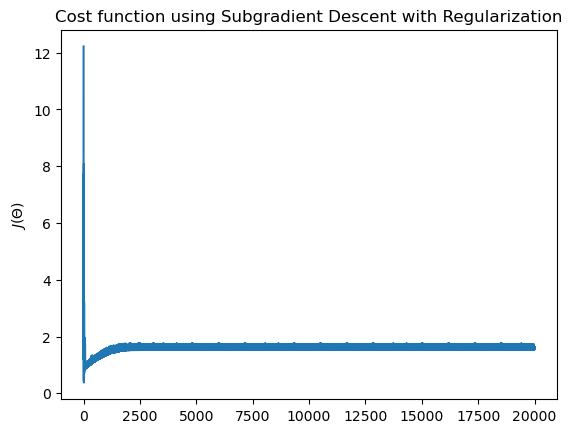

In [446]:
plt.plot(cost_history)
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Subgradient Descent with Regularization")
#plt.xlim(800,10000)
#plt.yscale('log')
plt.show()

([<matplotlib.axis.YTick at 0x2a78ece80>,
 [Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, '$\\pi/2$'),
  Text(0, 3.141592653589793, '$\\pi$')])

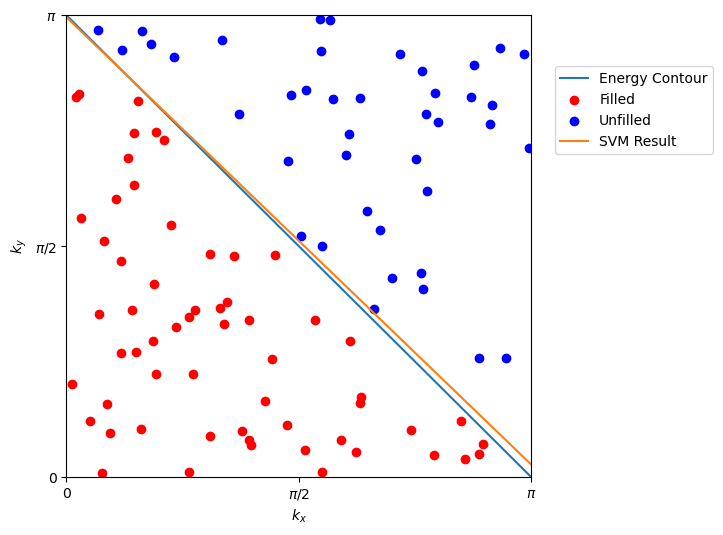

In [447]:
x_plot=np.array([0, np.pi])
plt.figure(figsize=(6,6))
plt.plot(x_plot,-x_plot+np.pi,label='Energy Contour')
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.plot(x_plot, (-theta[1]*x_plot-theta[0])/theta[2],label='SVM Result')
plt.legend(loc=(1.05,0.7))
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])

### Logistic Regression

In [448]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

# Activation function used to map any real value between 0 and 1
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

# Computes the weighted sum of inputs Similar to Linear Regression
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

# Calculates the probability that an instance belongs to a particular class
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

# Computes the cost function for all the training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum([np.log(self.probability(theta, x[i])) if y[i]==1 else np.log(1-self.probability(theta, x[i])) for i in range(m)])
        return total_cost

# Computes the gradient of the cost function at the point theta
    def gradient(self, theta, x, y):
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta,iterations=1000):
        alpha=0.1
        I=int(iterations/20)
        for it in range(iterations):
            if it % I == -1:
              alpha/=2
            theta=theta-alpha*self.gradient(theta, x, y)
        self.w_ = theta[:,0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

In [449]:
y = np.where(occupancy,1.,0.).reshape((N,1))
y = np.array(y)
#print(y)
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.zeros((X_b.shape[1], 1))

In [450]:
n_iter = 20000
model1 = LogisticRegressionUsingGD()
model1.fit(X_b, y, theta, n_iter)
accuracy = model1.accuracy(X_b, y.flatten())
parameters = model1.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters got by Gradient descent:")
print(parameters)

The accuracy of the model is 100.0
The model parameters got by Gradient descent:
[18.30324954 -5.56897104 -5.99560319]


([<matplotlib.axis.YTick at 0x2a7cb5d90>,
 [Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, '$\\pi/2$'),
  Text(0, 3.141592653589793, '$\\pi$')])

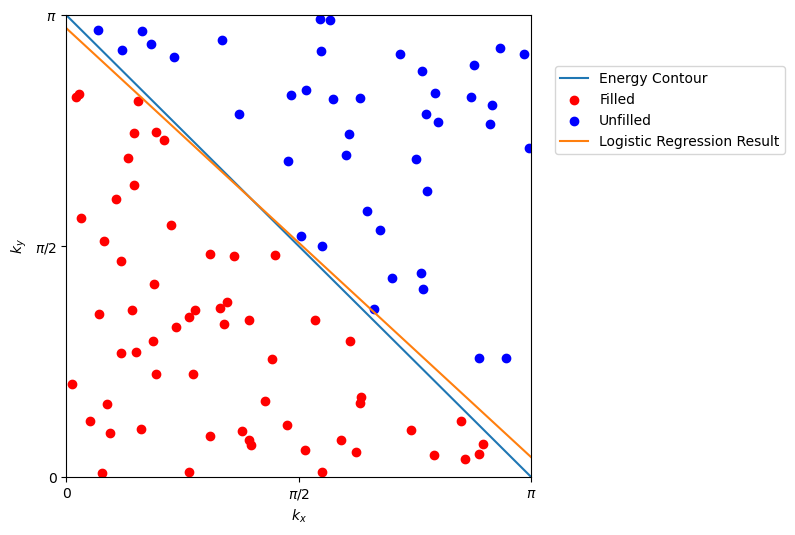

In [451]:
x_plot=np.arange(0, np.pi, 0.01)
# y_plot=np.arccos(-mu/2-np.cos(x_plot))
# y_plot=np.arccos(2-mu-np.cos(x_plot)) # fky = cos^-1(2-mu-cos(kx))
y_plot=x_plot.copy()
plt.figure(figsize=(6,6))
plt.plot(x_plot,-x_plot+np.pi,label='Energy Contour')
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.plot(x_plot, (-parameters[1]*x_plot-parameters[0])/parameters[2],label='Logistic Regression Result')
plt.legend(loc=(1.05,0.7))
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])

# Part c
At energy $E(k_x, k_y) = 0.5$, the straight-line boundary might not be suitable to approximate the energy contour. Also, since x and y directions are equivalent in this model, the Fermi surface should be symmetric along $x = y$. In other words, the coefficients of Θ in kx and ky terms should equal, the same goes for $k_x^2$ and $k_y^2$. We can manually enforce this condition by introducing symmetric features for the fitting. Consider the following features $X_2 = [k_x + k_y, k_x^2 + k_y^2, k_x ∗ k_y]$. Perform SVM and logistic regression with N = 500 sample points and 20,000 iteration steps, and show the result of two methods and the Fermi surface on the $(k_x, k_y)$ space. You can refer to the plot (5), (6).

In [452]:
N=500
mu=1/2    #chemical potential E(kx,ky)=0.5

In [453]:
kx_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
ky_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))

In [454]:
E=[float(2 - np.cos(kx_list[i]) - np.cos(ky_list[i])) for i in range(N)]
#print(E)
occupancy=[E[i]<=mu for i in range(N)]
#print(occupancy)

/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_64764/3582949672.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E=[float(2 - np.cos(kx_list[i]) - np.cos(ky_list[i])) for i in range(N)]


### SVM

In [455]:
y = np.where(occupancy,1.,-1.).reshape((N,1))

In [456]:
# X=np.array([kx_list[:,0], ky_list[:,0], kx_list[:,0]**2, ky_list[:,0]**2,kx_list[:,0]*ky_list[:,0]])
X=np.array([kx_list[:,0] + ky_list[:,0], kx_list[:,0]**2 + ky_list[:,0]**2, kx_list[:,0]*ky_list[:,0]]) # This is X2
print(X)
X=X.T
theta = np.random.random((X.shape[1]+1,1))
print(theta)

[[3.61825864 3.60653655 2.7827405  ... 2.75116318 4.04250586 3.27633393]
 [6.66299085 9.41043179 7.34149377 ... 6.17662304 9.05678614 6.07286974]
 [3.21440236 1.79833705 0.20107547 ... 0.6961379  3.64253375 2.33074713]]
[[0.10750609]
 [0.6512404 ]
 [0.63849992]
 [0.25705924]]


In [457]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta):
    m = float(len(y))
    theta2 = np.square(theta[1:])
    cost = (1/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

In [458]:
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]

    fx = np.multiply(y,(X_b.dot(theta)))

    check = np.less(fx,np.ones(fx.shape))

    check = np.where(check==True,1,0)

    return check

def subgradient_descent(X,y,theta,iterations=100):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])

    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,X_b.shape[1]))
    alpha=0.1
    I=int(iterations/20)
    for it in range(iterations):
        if it % I == -1:
          alpha/=2
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*theta[1:]/m
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta)

    # for it in range(iterations):
    #     if it % I == 0 and it != 0:
    #         alpha /= 2
        
    #     gradient = ((np.multiply(check(X, y, theta), y)).T.dot(X_b)).T / m
    #     theta = theta + alpha * gradient
    #     theta[1:] = theta[1:] - alpha * theta[1:] / m  # Regularization
        
    #     theta_history[it, :] = theta.T
    #     cost_history[it] = computeCost(X_b, y, theta)

    return theta, cost_history, theta_history

Here we also include the second order term of $k_x$ and $k_y$ as features, as we need to approximate curve other than simple straight line.

In [459]:
n_iter = 20000
theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter)
print(theta)
print('Final Cost is :', cost_history[-1])

[[ 50.90750609]
 [-15.48665727]
 [-30.77451656]
 [  7.46857814]]
Final Cost is : 1.242687082391968


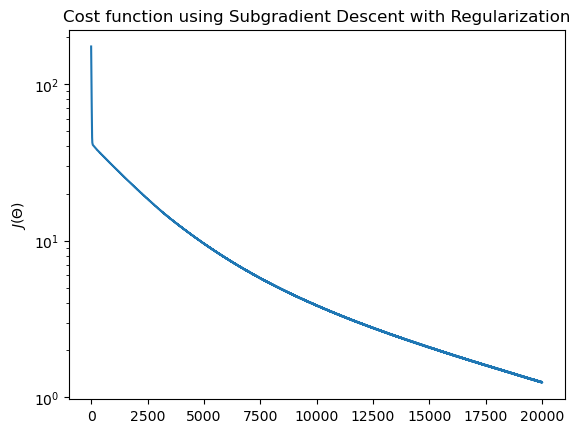

In [460]:
plt.plot(cost_history)
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Subgradient Descent with Regularization")
plt.yscale('log')
plt.show()

/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_64764/4199069484.py:2: RuntimeWarning: invalid value encountered in arccos
  y_plot=np.arccos(2-mu-np.cos(x_plot)) # fky = cos^-1(2-mu-cos(kx))


([<matplotlib.axis.YTick at 0x2a633c460>,
 [Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, '$\\pi/2$'),
  Text(0, 3.141592653589793, '$\\pi$')])

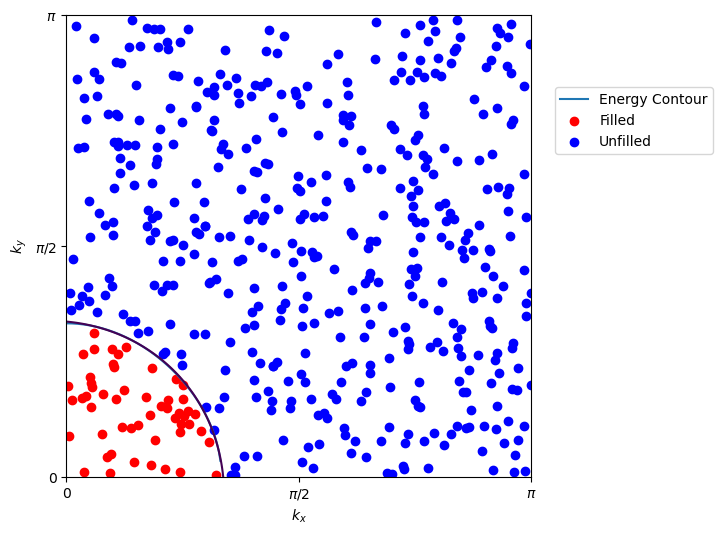

In [461]:
x_plot=np.arange(0, np.pi, 0.01)
y_plot=np.arccos(2-mu-np.cos(x_plot)) # fky = cos^-1(2-mu-cos(kx))
[XX,YY]=np.meshgrid(x_plot,x_plot)

plt.figure(figsize=(6,6))
plt.plot(x_plot,y_plot,label='Energy Contour')
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
# plt.scatter(kx_list[not occupancy], ky_list[not occupancy], c='b', label='Unfilled')

plt.contour(XX, YY, theta[0]+theta[1]*XX + theta[1]*YY + theta[2]*XX**2 + theta[2]*YY**2 + theta[3]*XX*YY,[0])
#  enforce symmetry condition here as kx = ky, they share the same parameter.



plt.legend(loc=(1.05,0.7))
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])

### Logistic Regression

In [462]:
y = np.where(occupancy,1.,0.).reshape((N,1))
y = np.array(y)
#print(y)
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.zeros((X_b.shape[1], 1))

In [463]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

# Activation function used to map any real value between 0 and 1
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

# Computes the weighted sum of inputs Similar to Linear Regression
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

# Calculates the probability that an instance belongs to a particular class
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

# Computes the cost function for all the training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum([np.log(self.probability(theta, x[i])) if y[i]==1 else np.log(1-self.probability(theta, x[i])) for i in range(m)])
        return total_cost

# Computes the gradient of the cost function at the point theta
    def gradient(self, theta, x, y):
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta,iterations=1000):
        alpha=0.1
        I=int(iterations/20)
        for it in range(iterations):
            if it % I == -1:
              alpha/=2
            theta=theta-alpha*self.gradient(theta, x, y)
        self.w_ = theta[:,0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

In [464]:
n_itr=20000
model1 = LogisticRegressionUsingGD()
model1.fit(X_b, y, theta,n_itr)
accuracy = model1.accuracy(X_b, y.flatten())
parameters = model1.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters got by Gradient descent:")
print(parameters)

The accuracy of the model is 100.0
The model parameters got by Gradient descent:
[ 7.52602622  0.96987625 -7.92660455 -0.98631487]


/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_64764/2114094081.py:2: RuntimeWarning: invalid value encountered in arccos
  y_plot=np.arccos(2-mu-np.cos(x_plot)) # fky = cos^-1(2-mu-cos(kx))


([<matplotlib.axis.YTick at 0x2a5f53fa0>,
 [Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, '$\\pi/2$'),
  Text(0, 3.141592653589793, '$\\pi$')])

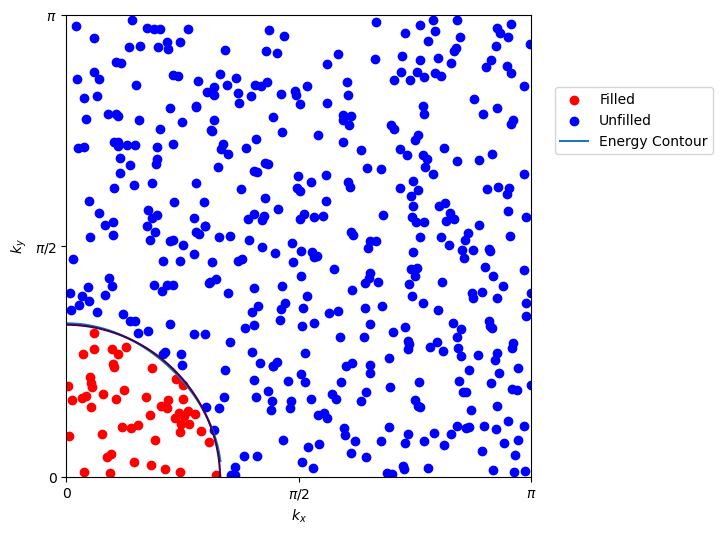

In [465]:
x_plot=np.arange(0, np.pi, 0.01)
y_plot=np.arccos(2-mu-np.cos(x_plot)) # fky = cos^-1(2-mu-cos(kx))
[XX,YY]=np.meshgrid(x_plot,x_plot)

plt.figure(figsize=(6,6))
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.plot(x_plot,y_plot,label='Energy Contour')
plt.contour(XX,YY, parameters[0]+parameters[1]*XX+parameters[1]*YY+parameters[2]*XX**2+parameters[2]*YY**2+parameters[3]*XX*YY,[0])
#  enforce symmetry condition here as kx = ky, they share the same parameter.

plt.legend(loc=(1.05,0.7))
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])